# Условия

Геометрия фермы (со всеми элементами):

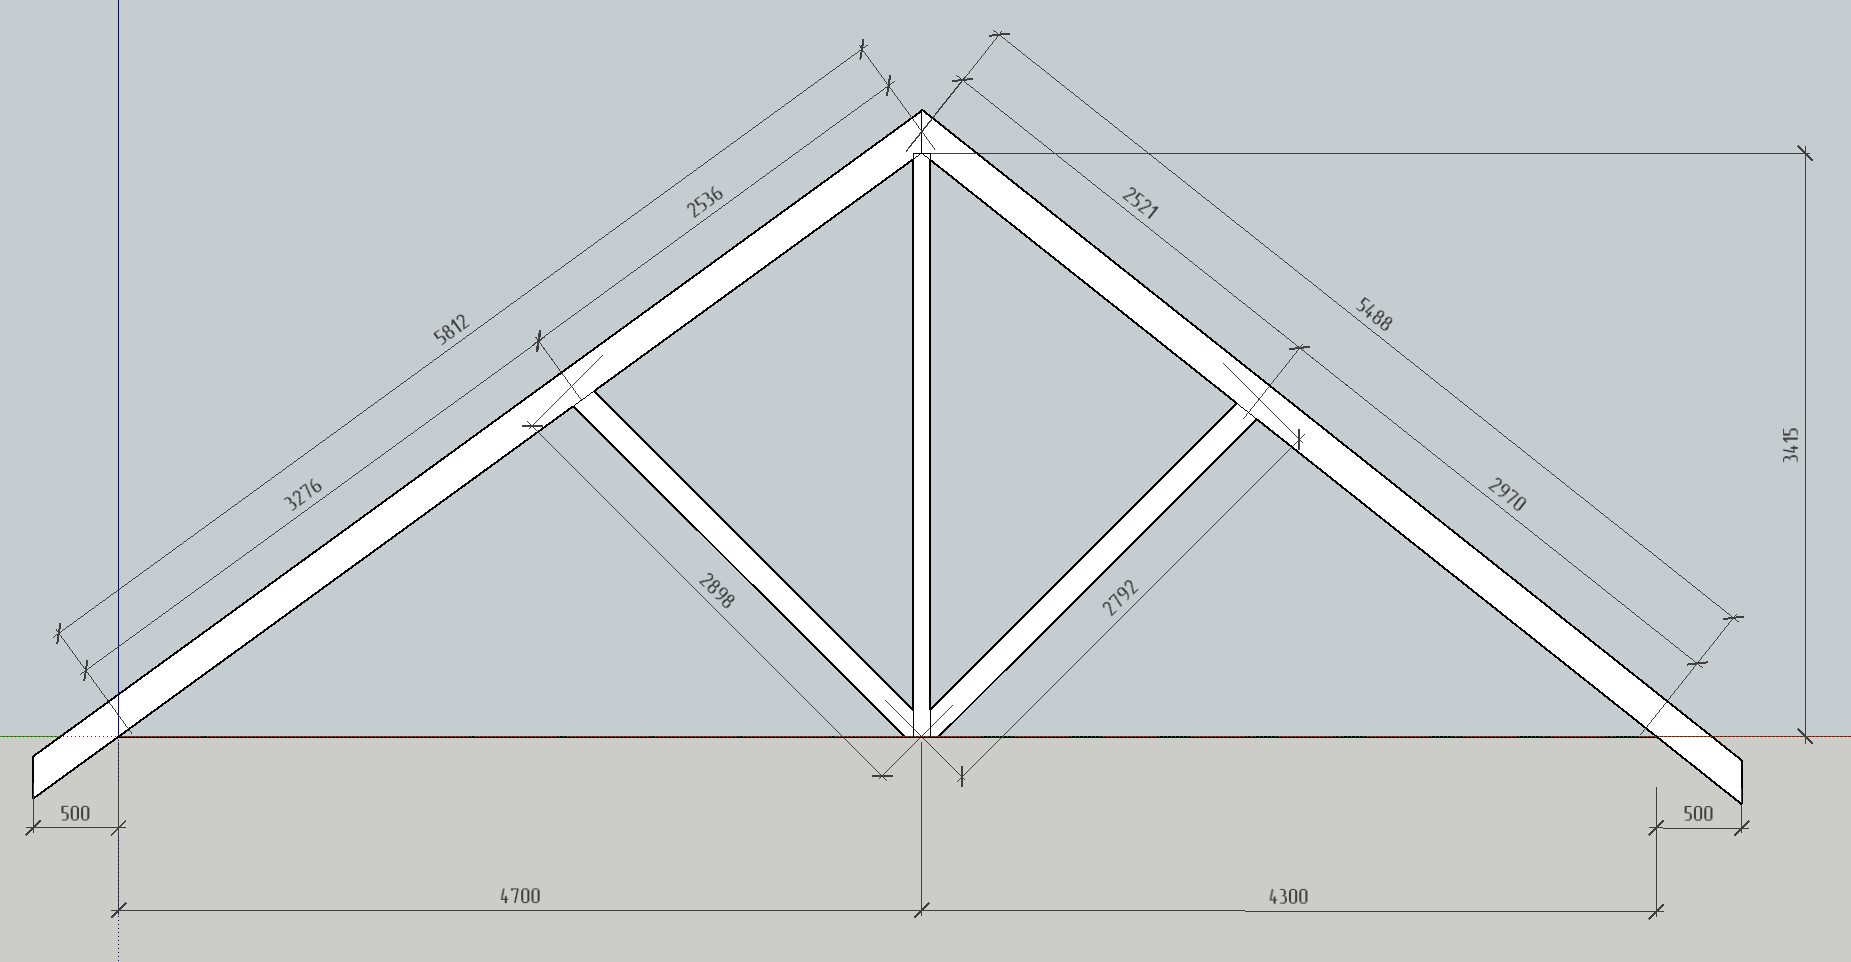

Ниже рассмотрены различные варианты: висячие системы, наслонные системы, со стойками, подкосами, затяжками и без них.

### Материалы:

* стропила: сосна, 200x50 мм.
* подкосы: сосна, 150х50 мм.
* стойка: сосна, 100х100 мм.

### Нагрузки

* Собственный вес: $134.75 Н/м^{2}$
* Снеговая: $2240 Н/м^{2}$

Предполагается шаг стропильных ферм 1 м.

### Требования по прочности, устойчивости

Предельные прогибы для балок, ферм, ригелей, прогонов, плит, настилов:
* $l \le 1 м : 1/120$
* $l = 3 м : 1/150$
* $l = 6 м : 1/200$
* $l = 24 м : 1/250$
* $l \ge 36 м : 1/300$

Предельный прогиб для стропил длиной 5.5..6 м принимается $1/200$.

In [21]:
l1 = 5800 # left rafter len 
l2 = 5500 # right rafter len 

k = 1.0/200

md1 = l1*k
md2 = l2*k

print('Maximum deflection for rafter', l1, 'mm:', int(round(md1, 0)), 'mm')
print('Maximum deflection for rafter', l2, 'mm:', int(round(md2, 0)), 'mm')

Maximum deflection for rafter 5800 mm: 29 mm
Maximum deflection for rafter 5500 mm: 28 mm


## Вариант 1: висячая стропильная система, только стропила

Система является простейшей и состоит из двух стропил, две точки закрепления, связи в обеих фиксированы по осям X, Z. Т.е. распорное усилие передаётся на эти узлы. Цель: определить прогибы стропил, распорные усилия.

Результат моделирования представлен на изображении:
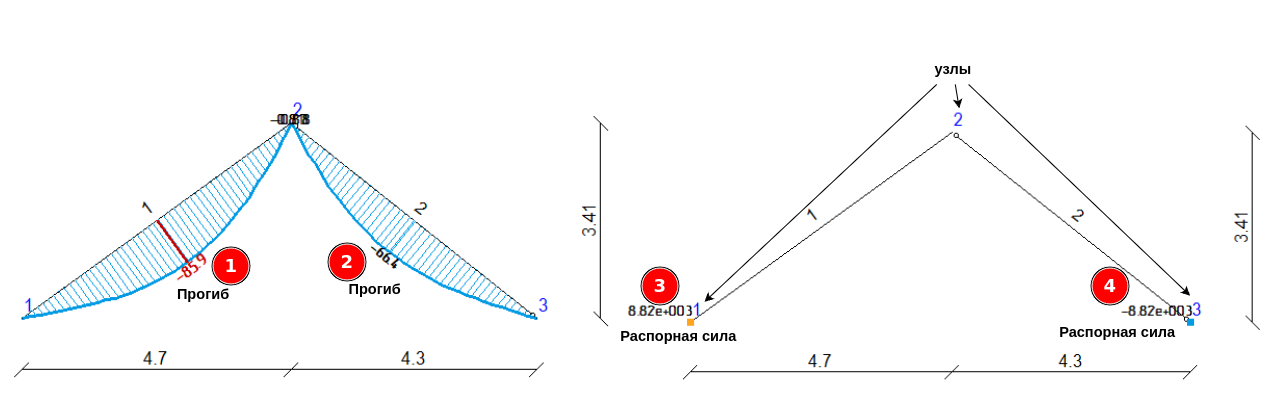

Полученные прогибы 86 (1) и 66 (2) мм значительно превышают предельные. А распорные усилия — силы, действующие вдоль горизонтальной оси наружу от стен, составляют значительную величину в $8.82 кН$ (3), (4) или порядка $900 кгс$, т.е. на каждую стену со стороны каждой стропилы действует сила величиной почти в тонну. 

Очевидно, что данная система является абсолютно не рабочей.


## Вариант 2: наслонная стропильная система, стропила со стойкой

Система отличается от предыдущего варианта наличием стойки. Узлы 1, 2 и 4 так же фиксированы по осям X, Z. Результат моделирования:

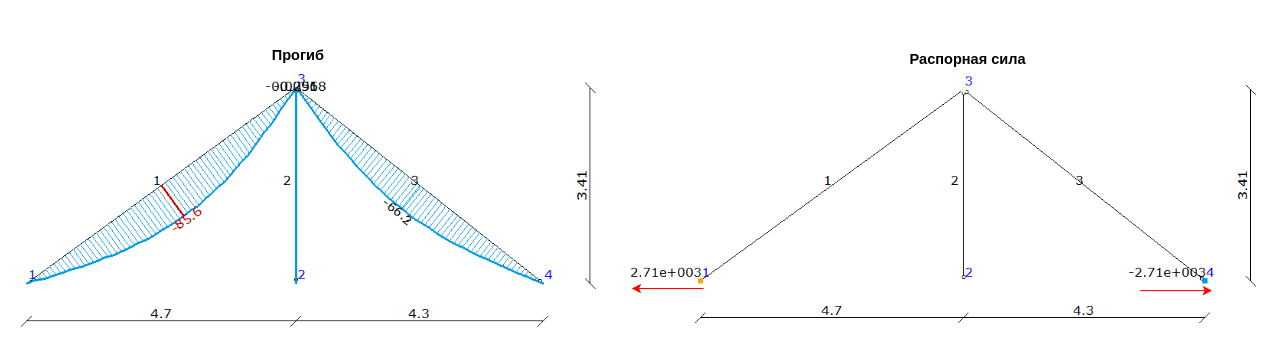

Как видно, наличие стойки мало повлияло прогибы, что вполне объяснимо — длинные стропила воспринимают ту же самую нагрузку. Распорные усилия значительно меньше, чем в предыдущем случае, что тоже понятно — стойка приняла на себя часть нагрузки. Данная система так же является не рабочей.

## Вариант 3: наслонная стропильная система со стойкой и подкосами

Рассмотренные выше варианты показали, что заданная нагрузка на выбранной длине стропил приводит к неприемлемым прогибам. Для решения этой проблемы необходимо исползовать дополнительные опорные элементы — стойки или подкосы. Для для стоек нужны опорные точки непосредственно на оси стойки, таких опорных точек в конструкции не предусмотрено, их нужно организовывать специально. Подкосы могут опираться на центральную несущую стену, потому этот способ представляется более рациональным.

Схема с подкосами показана выше на изображении геометрии фермы. Подкосы образуют угол в $45°$ с осью стойки. Противоположные концы подкосов делят стропила на сегменты длиной:

* левое стропило: 3276 мм и 2533 мм;
* правое стропило: 2970 мм и 2521 мм;

Допустимый прогиб для этих сегментов составит (принимая для этой длины коэффициент $1/150$):


In [19]:
l1_1 = 3276 # left rafter segment 1 len 
l1_2 = 2533 # left rafter segment 2 len 
l2_1 = 2970 # right rafter segment 1 len 
l2_2 = 2521 # right rafter segment 2 len 

k = 1.0/150

md1_1 = l1_1*k
md1_2 = l1_2*k
md2_1 = l2_1*k
md2_2 = l2_2*k

print('Maximum deflection for rafter segment', l1_1, 'mm:', int(round(md1_1, 0)), 'mm')
print('Maximum deflection for rafter segment', l1_2, 'mm:', int(round(md1_2, 0)), 'mm')
print('Maximum deflection for rafter segment', l2_1, 'mm:', int(round(md2_1, 0)), 'mm')
print('Maximum deflection for rafter segment', l2_1, 'mm:', int(round(md2_1, 0)), 'mm')


Maximum deflection for rafter segment 3276 mm: 22 mm
Maximum deflection for rafter segment 2533 mm: 17 mm
Maximum deflection for rafter segment 2970 mm: 20 mm
Maximum deflection for rafter segment 2970 mm: 20 mm


Результат моделирования:

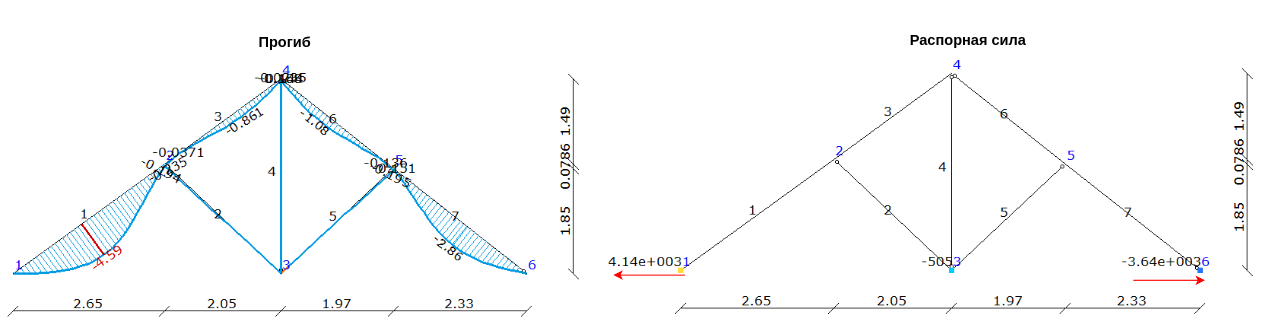

Как видно, прогибы стропил очень незначительные, самый большой прогиб в $4.6 мм$ многократно меньше допуска ($22 мм$). Поперечные распорные силы, однако, значительны, что нежелательно, т.к. оказывает негативное боковое воздействие на стену. К боковым силам стены имеют значительно меньшую сопротивляемость, чем к вертикальным.

Если опорные точки не фиксировать по горизонтальной оси — например, сделать скользящие опоры, чтобы распорные силы не действовали на гребни стен, то картина по прогибам получается следующая:

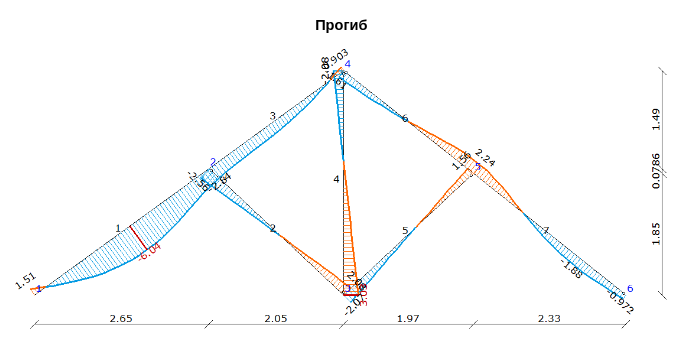

Горизонтальных сил, действующих на опоры стропильных ног, тут нет, но конструкция не имеет жёсткости в нижней части и в силу несимметричности склонна к деформациям, показанным на изображении.

## Вариант 4: наслонная стропильная система со стойкой, подкосами и затяжкой

Рассмотренный выше вариант демонструет малые прогибы стропил, но значительные горизонтальные (распорные) усилия в точках опоры стропильных ног. Эти усилия действуют на верхние кромки стен, что создаёт ненужные изгибающие напряжения, сопротивление к которым у стен посредственное. В предельном случае это может привести к разрушению (опрокидыванию) верхней части стены. Даже при наличие армирующего пояса этот фактор не перестаёт существовать, т.к. поверх армопояса существуют дополнительные элементы стены — например, министенка чердака, необходимая для огранизации качественного утепления перекрытия и верхней части стены.

Для устранения (или радикального ослабления) действия распрорных сил применяются затяжки — горизонтальные элементы, соединяющие стропильные ноги между собой (или другими опорными узлами конструкции) и работающие на растяжение. Расчёт такого варианта, прогибы:

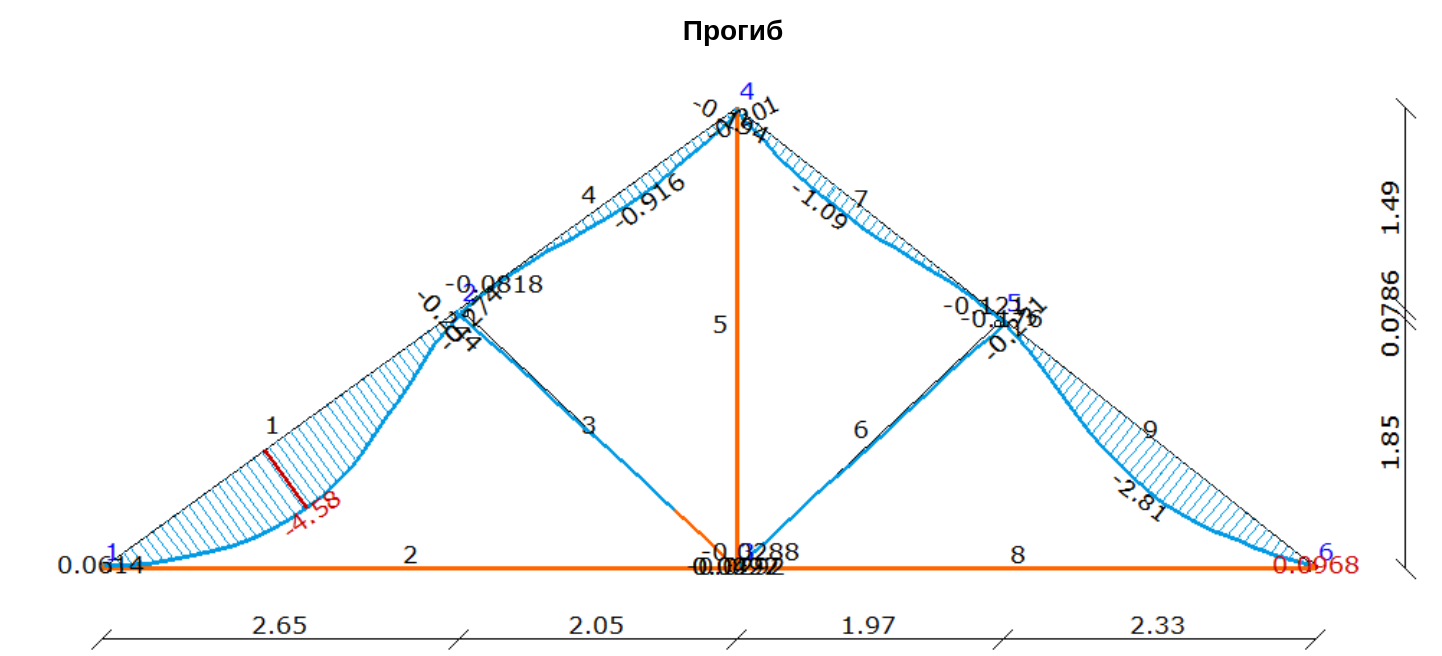

Величины прогибов, как и в предыдущем варианте, незначительны. Конструкция обладает жёсткостью, заданную форму не теряет.
